<a href="https://colab.research.google.com/github/dfedeoli/btc2020/blob/main/BTCdesafio4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MARATONA BEHIND THE CODE 2020

## DESAFIO 4: ALGAR

O *turnover* (rotatividade de funcionários) alto gera uma série de custos adicionais, indo muito além do impacto na lucratividade, rentabilidade e o próprio crescimento da organização. A saída em excesso cria um clima inadequado, no qual conflitos interpessoais podem ocorrer com maior frequência, e gerando também a perda de conhecimento. A comunicação interna e externa é afetada, impactando inclusive na atração de novos talentos.

Este desafio tem como objetivo criar um modelo no *Modeler Flow* (SPSS) capaz de encontrar o melhor candidato de acordo com as variáveis do dataset fornecido. O intuito é modelar os dados de tal forma que o modelo, que recebe como entrada todas as colunas do dataset, forneça como saída se o candidato deve ser contratado ou não.

A ideia essencial é criar um modelo baseado em *machine learning*, capaz de contratar o melhor candidato baseado em algumas variáveis, permitindo assim a escolha do profissional mais adequado à vaga. Trata-se de um problema de classificação binária, onde o modelo só possui dois valores possíveis de saída.

Para simplificar o desafio e mostrar ao usuários outras opções de modelagem dentro do *Watson Studio* (*Cloud Pak for Data as a Service*), foi pedido que fosse usado o *Modeler Flow* (SPSS). Sua simplicidade e interface amigável torna acessível o uso, aprendizado e pesquisa na área de ciência de dados por pessoas que não possuem um grande conhecimento em Python ou R.

Em linhas gerais, o *Modeler Flow* tem a mesma função de um *Jupyter Notebook*, a diferença reside no fato de que a ferramante abstraí a parte do código para focar somente nos dados.

Proposição completa do Desafio: https://github.com/maratonadev-br/desafio-4-2020

## Alternativa ao *SPSS Modeler Flow*

Este Desafio foi concluído na plataforma Watson Studio, da IBM Cloud, da maneira que foi pedida. Porém, como forma de demonstrar minha resolução de maneira didática e ampliar meu portfólio, irei refazer o Desafio no Jupyter Notebook seguindo os mesmo passos da resolução via *Modeler Flow*, com algumas adaptações.

## Preparação do notebook, obtenção e visualização dos dados

### Importando bibliotecas importantes

In [1]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# Pacote para exploração e análise de dados
import pandas as pd

# Pacote com métodos numéricos e representações matriciais
import numpy as np

# Pacote para construção de modelo baseado na técnica Gradient Boosting
import xgboost as xgb

# Pacotes do scikit-learn para treinamento de modelos e construção de pipelines
# Método para separação de conjunto de dados em amostras de treino e teste
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression

### Download dos conjuntos de dados em formato .csv

A aquisição do conjunto de dados de treino é feita pelo *GitHub* da Maratona, disponível no link: https://raw.githubusercontent.com/maratonadev-br/desafio-4-2020/master/data/train_dataset_algartech.csv

In [2]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/maratonadev-br/desafio-4-2020/master/data/train_dataset_algartech.csv
df_training_dataset = pd.read_csv(r'train_dataset_algartech.csv')
df_training_dataset.tail()

--2021-03-19 13:11:04--  https://raw.githubusercontent.com/maratonadev-br/desafio-4-2020/master/data/train_dataset_algartech.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211702 (207K) [text/plain]
Saving to: ‘train_dataset_algartech.csv’

train_dataset_algar 100%[===================>] 206.74K  --.-KB/s    in 0.03s   

2021-03-19 13:11:04 (6.82 MB/s) - ‘train_dataset_algartech.csv’ saved [211702/211702]



,Idade,Local de trabalho,Pontuação teste,Departmento,Distancia casa-trabalho,Educacao,Area,Possui carro,Subordinado,Satisfação com o ambiente no emprego atual,Genero,Horas voluntariado,Envolvimento com trabalho,Posicao,Cargo,Satisfação com emprego,Estado civil,Renda,Bonus de performance,Quantidade de empresas que trabalho,Maior de idade,Necessita de hora extra,Aumento de salario%,Performance na entrevista,Satisfação com a relação,Horas de trabalho padrão,Beneficios,Anos de experiencia,Horas de treinamento ultimo ano,Estilo de vida,Anos na última empresa,Anos na posição atual,Anos desde última promoção,Anos com a mesma gerência,Contratar
1365,23,Misto,638,Vendas,9,Superior completo,Marketing,1,2023,4,M,33,3,1,Vendedor junior,1,Casado,1790,26956,1,1,Não,19,3,1,80,1,1,3,2,1,0,1,0,Sim
1366,29,Misto,1092,Engenharia,1,Superior incompleto - cursando,Medicina,1,2027,1,M,36,3,1,Engenheiro,4,Casado,4787,26124,9,1,Sim,14,3,2,80,3,4,3,4,2,2,2,2,Sim
1367,56,Cliente,310,Engenharia,7,Superior incompleto,Faculdade Técnica,1,2032,4,M,72,3,1,Tecnico,3,Casado,2339,3666,8,1,Não,11,3,4,80,1,14,4,1,10,9,9,8,Sim
1368,50,Misto,878,Vendas,1,Superior incompleto - cursando,Ciências das natureza,1,2044,2,M,94,3,2,Vendedo senior,3,Divorciado,6728,14255,7,1,Não,12,3,4,80,2,12,3,3,6,3,0,1,Sim
1369,50,Cliente,410,Vendas,28,Superior completo,Marketing,1,2055,4,M,39,2,3,Vendedo senior,1,Divorciado,10854,16586,4,1,Sim,13,3,2,80,1,20,3,3,3,2,2,0,Sim


### Explorando os dados fornecidos

In [3]:
df_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Idade                                       1370 non-null   int64 
 1   Local de trabalho                           1370 non-null   object
 2   Pontuação teste                             1370 non-null   int64 
 3   Departmento                                 1370 non-null   object
 4   Distancia casa-trabalho                     1370 non-null   int64 
 5   Educacao                                    1370 non-null   object
 6   Area                                        1370 non-null   object
 7   Possui carro                                1370 non-null   int64 
 8   Subordinado                                 1370 non-null   int64 
 9   Satisfação com o ambiente no emprego atual  1370 non-null   int64 
 10  Genero                  

O dataset não possui dados faltantes, então não será necessário fazer tratamento de dados neste sentido.

In [4]:
df_training_dataset.nunique()

Idade                                           43
Local de trabalho                                3
Pontuação teste                                853
Departmento                                      3
Distancia casa-trabalho                         29
Educacao                                         5
Area                                             6
Possui carro                                     1
Subordinado                                   1370
Satisfação com o ambiente no emprego atual       4
Genero                                           2
Horas voluntariado                              71
Envolvimento com trabalho                        4
Posicao                                          5
Cargo                                            9
Satisfação com emprego                           4
Estado civil                                     3
Renda                                         1269
Bonus de performance                          1329
Quantidade de empresas que trab

Como as variáveis ``Possui carro``, ``Maior de idade`` e ``Horas de trabalho padrão`` possuem apenas uma resposta cada, estas colunas já serão removidas.

In [5]:
df_training_dataset_1 = df_training_dataset.drop(['Possui carro','Maior de idade','Horas de trabalho padrão'],axis=1)

## Análise exploratória dos dados

### Distribuição da variável-alvo

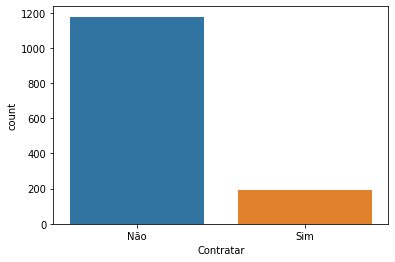

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig = plt.plot()
sns.countplot(x='Contratar', data=df_training_dataset)
plt.show()

### Influência das variáveis categóricas 

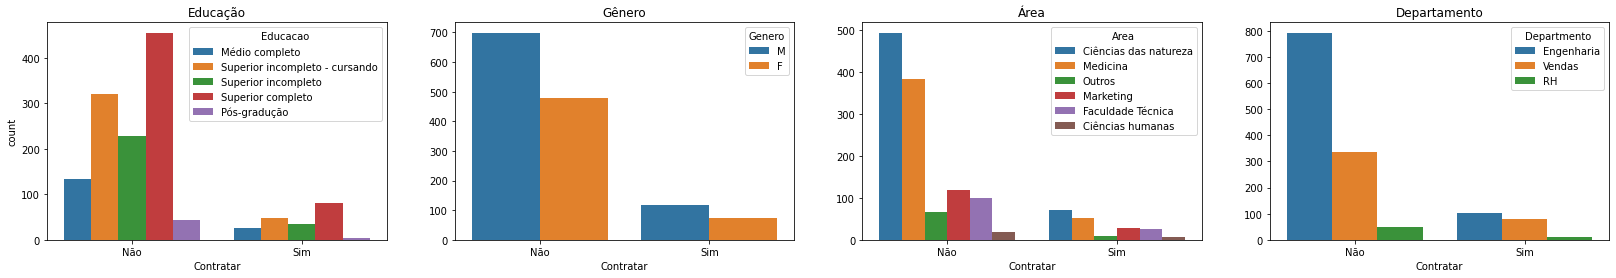

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(28, 4))

sns.countplot(ax=axes[0], x='Contratar', hue = 'Educacao', data=df_training_dataset).set(title='Educação')
sns.countplot(ax=axes[1], x='Contratar', hue = 'Genero', data=df_training_dataset).set(ylabel='',title='Gênero')
sns.countplot(ax=axes[2], x='Contratar', hue = 'Area', data=df_training_dataset).set(ylabel='',title='Área')
sns.countplot(ax=axes[3], x='Contratar', hue = 'Departmento', data=df_training_dataset).set(ylabel='',title='Departamento')
plt.show()

As variáveis ``Educacao``, ``Genero``, ``Area`` e ``Departmento`` não parecem possuir grande influência na seleção dos candidatos, pois possuem proporções parecidas tanto para o valor-alvo ``Não`` quanto para ``Sim``.

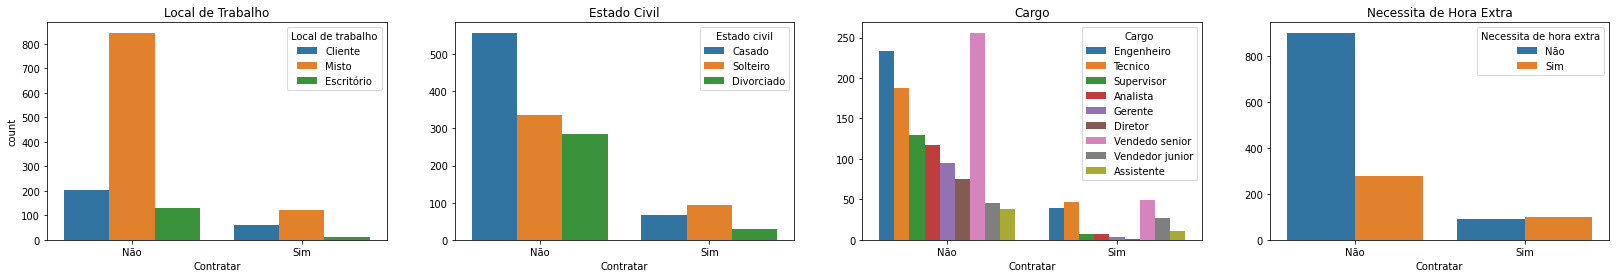

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(28, 4))

sns.countplot(ax=axes[0], x='Contratar', hue = 'Local de trabalho', data=df_training_dataset).set(title='Local de Trabalho')
sns.countplot(ax=axes[1], x='Contratar', hue = 'Estado civil', data=df_training_dataset).set(ylabel='',title='Estado Civil')
sns.countplot(ax=axes[2], x='Contratar', hue = 'Cargo', data=df_training_dataset).set(ylabel='',title='Cargo')
sns.countplot(ax=axes[3], x='Contratar', hue = 'Necessita de hora extra', data=df_training_dataset).set(ylabel='',title='Necessita de Hora Extra')
plt.show()

Nos casos acima, já é possível visualizar uma influência maior das variáveis na contratação. O trabalho com visita ao cliente possui um potencial de contratação ainda menor que o local de trabalho misto, mas a diferença entre estas categorias é muito menor do que a diferença nas colunas dos candidatos não-selecionados.

Aparentemente, também é preferível a contratação de candidatos solteiros. Isto pode ser por necessidade de mudança ou de viagens constantes pela empresa.

No caso da variável `Cargo`, não deve haver muitas vagas para as posições de Supervisor, Analista, Gerente e Diretor, visto que ele são muito menos selecionados para contratação. Da mesma forma, a posição de Engenheiro possui uma proporção menor de contratação quando comparado à posição de Técnico.

Por último, a proporção de contratação de candidatos que precisam de hora extra é muito mais parelha do que a proporção de não-contratação.

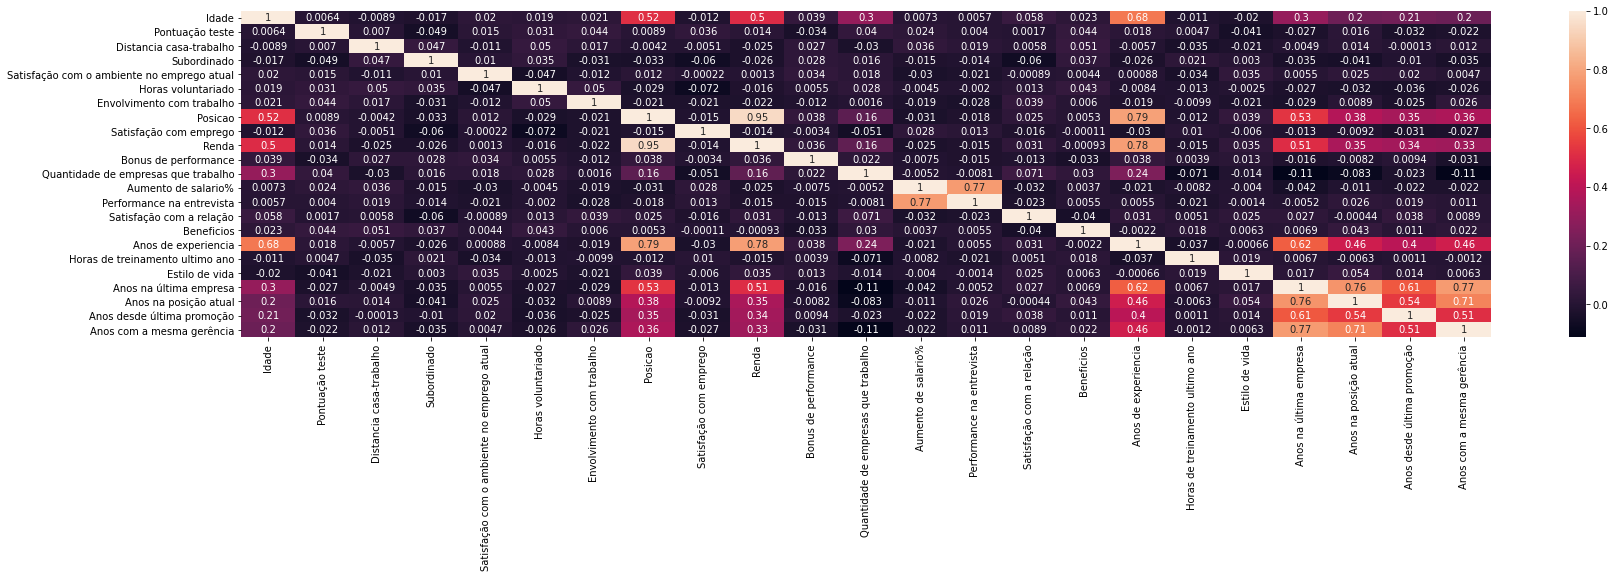

In [14]:
plt.figure(figsize=(28, 6))
corrMatrix = df_training_dataset_1.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

As colunas ``Posicao`` e ``Renda`` possuem uma correlação positiva quase perfeita (0.95), o que faz sentido, pois quanto melhor sua posição numa empresa, maior o salário. Já as colunas ``Performance na entrevista`` e ``Aumento de salario%`` possuem baixa correlação com todas as outras variáveis, mas é alta entre elas. A matriz de correlação aponta também alta relação entre as variáveis de anos de trabalho (as quatro últimas da matriz).

## Iniciando o pré-processamento dos dados

### Seleção de *features*

De início, apenas duas variáveis contínuas serão removidas, que são as colunas ``Renda`` e ``Performance na entrevista``, que possuem as correlações altas expostas na seção anterior. 

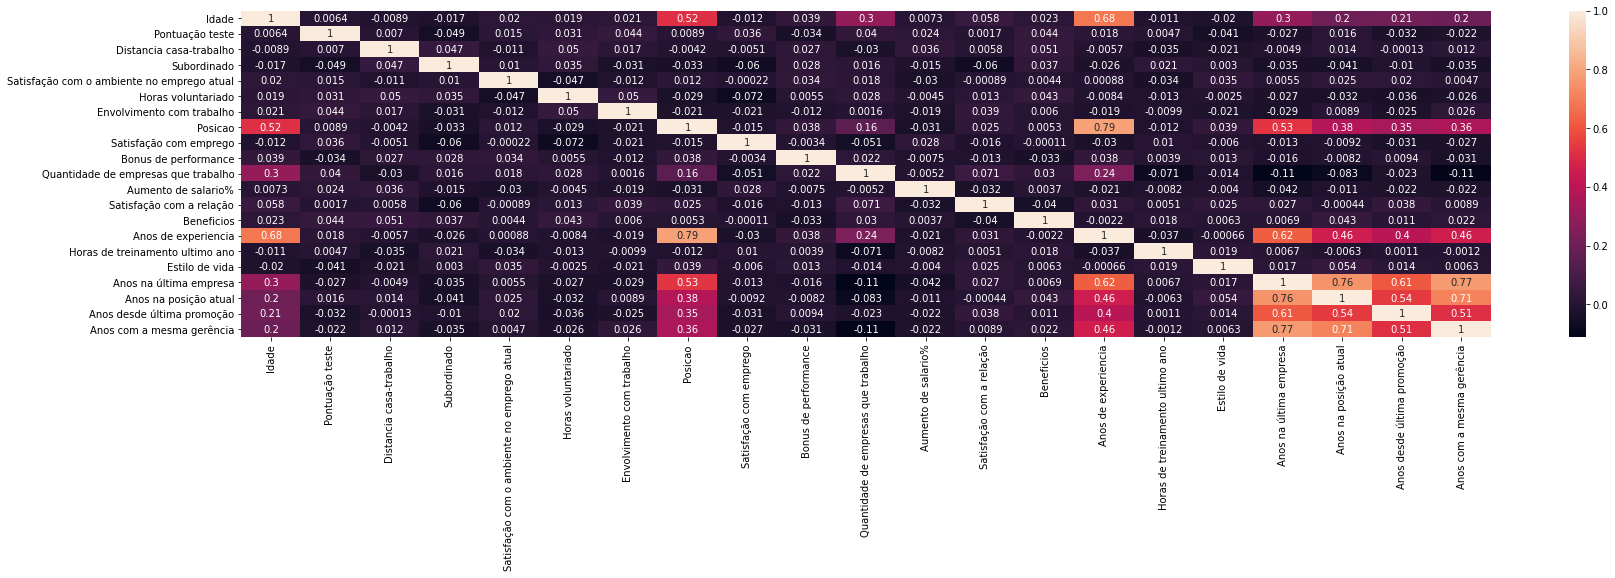

In [15]:
plt.figure(figsize=(28, 6))
df_dropped = df_training_dataset_1.drop(['Renda', 'Performance na entrevista'],axis=1)
corrMatrix = df_dropped.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

A escolha das variáveis categóricas a serem utilizadas é realizada com ajuda dos gráficos mostrados anteriormente e do método *Pearson chi-square*, por análise do *p-value*. Este método testa a independência da variável-alvo em relação às *features* categóricas, sem indicar a força ou direção da relação existente. Se o *p-value* for maior que o *alpha* escolhido, que no nosso caso é *alpha* igual a 0.05, quer dizer que a variável é independente do *target*.

In [16]:
from scipy.stats import chi2_contingency

columns_name = list(df_training_dataset_1.columns)
importance = []
labels = []

for i in range(df_training_dataset_1.shape[1]-1):
  
  #Determinando se a variável é categórica:
  if df_training_dataset_1[df_training_dataset_1.columns[i]].dtypes == 'object':

    # Adicionando o label da variável à coluna resultado
    labels.append(df_training_dataset_1.columns[i])

    #Tabela de contigência (feature categórico e target)
    data_crosstab = pd.crosstab(df_training_dataset_1['Contratar'],
                              df_training_dataset_1.iloc[:,i],  
                                margins = False)
    
    #valores obtidos pelo método Pearson chi-squared
    stat, p, dof, expected = chi2_contingency(data_crosstab)

    #p-value da variável
    importance.append(p)

imp = pd.DataFrame(importance, columns=['p-value'],index=labels)
imp.sort_values(by='p-value', ascending=False)
  

,p-value
Educacao,7.590159e-01
Genero,5.401526e-01
Area,1.653122e-02
Departmento,1.087191e-03
Local de trabalho,3.695472e-06
Estado civil,8.200750e-08
Cargo,9.873243e-14
Necessita de hora extra,1.282850e-16


Apenas dois valores possuem *p-value* maior que 0.05 (5.0e-02), mas somente ``Educacao`` será removida, pois deixar a coluna ``Genero`` resultou em melhores valores de acurácia e *F1-Score* mais adiante.

In [18]:
df_teste = df_dropped.drop(['Educacao'],axis=1)
df_teste.head()

,Idade,Local de trabalho,Pontuação teste,Departmento,Distancia casa-trabalho,Area,Subordinado,Satisfação com o ambiente no emprego atual,Genero,Horas voluntariado,Envolvimento com trabalho,Posicao,Cargo,Satisfação com emprego,Estado civil,Bonus de performance,Quantidade de empresas que trabalho,Necessita de hora extra,Aumento de salario%,Satisfação com a relação,Beneficios,Anos de experiencia,Horas de treinamento ultimo ano,Estilo de vida,Anos na última empresa,Anos na posição atual,Anos desde última promoção,Anos com a mesma gerência,Contratar
0,49,Cliente,279,Engenharia,8,Ciências das natureza,2,3,M,61,2,2,Engenheiro,2,Casado,24907,1,Não,23,4,1,10,3,3,10,7,1,7,Não
1,33,Misto,1392,Engenharia,3,Ciências das natureza,5,4,F,56,3,1,Engenheiro,3,Casado,23159,1,Sim,11,3,0,8,3,3,8,7,3,0,Não
2,27,Cliente,591,Engenharia,2,Medicina,7,1,M,40,3,1,Tecnico,2,Casado,16632,9,Não,12,4,1,6,3,3,2,2,2,2,Não
3,32,Misto,1005,Engenharia,2,Ciências das natureza,8,4,M,79,3,1,Tecnico,4,Solteiro,11864,0,Não,13,3,0,8,2,2,7,7,3,6,Não
4,59,Misto,1324,Engenharia,3,Medicina,10,3,F,81,4,1,Tecnico,1,Casado,9964,4,Sim,20,1,3,12,3,2,1,0,0,0,Não


### Tratamento de variáveis categóricas

Os modelos de predição não são bons com variáveis categóricas (ou *strings*). Dado uma coluna com variável categórica, o que podemos realizar é a codificação dessa coluna em múltiplas colunas contendo variáveis binárias. Esse processo é chamado de *one-hot-encoding* ou *dummy encoding*.

Para cada uma das variáveis categóricas, um dos valores possíveis será retirado pelo parâmetro ``drop_first = True`` para evitar o *dummy variable trap*. Isto é, remover uma variável por ela ser redundante, visto que quando todas as outras estiverem igual a zero, ela já está representada.

In [19]:
df_teste2= pd.get_dummies(df_teste, columns=['Local de trabalho','Departmento','Area','Cargo','Estado civil', 'Necessita de hora extra','Genero'], drop_first=True) #dummy trap?
df_teste2.head()

,Idade,Pontuação teste,Distancia casa-trabalho,Subordinado,Satisfação com o ambiente no emprego atual,Horas voluntariado,Envolvimento com trabalho,Posicao,Satisfação com emprego,Bonus de performance,Quantidade de empresas que trabalho,Aumento de salario%,Satisfação com a relação,Beneficios,Anos de experiencia,Horas de treinamento ultimo ano,Estilo de vida,Anos na última empresa,Anos na posição atual,Anos desde última promoção,Anos com a mesma gerência,Contratar,Local de trabalho_Escritório,Local de trabalho_Misto,Departmento_RH,Departmento_Vendas,Area_Ciências humanas,Area_Faculdade Técnica,Area_Marketing,Area_Medicina,Area_Outros,Cargo_Assistente,Cargo_Diretor,Cargo_Engenheiro,Cargo_Gerente,Cargo_Supervisor,Cargo_Tecnico,Cargo_Vendedo senior,Cargo_Vendedor junior,Estado civil_Divorciado,Estado civil_Solteiro,Necessita de hora extra_Sim,Genero_M
0,49,279,8,2,3,61,2,2,2,24907,1,23,4,1,10,3,3,10,7,1,7,Não,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,33,1392,3,5,4,56,3,1,3,23159,1,11,3,0,8,3,3,8,7,3,0,Não,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,27,591,2,7,1,40,3,1,2,16632,9,12,4,1,6,3,3,2,2,2,2,Não,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3,32,1005,2,8,4,79,3,1,4,11864,0,13,3,0,8,2,2,7,7,3,6,Não,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
4,59,1324,3,10,3,81,4,1,1,9964,4,20,1,3,12,3,2,1,0,0,0,Não,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0


## Treinando modelo de predição por regressão logística

No modelo de regressão logística do SPSS do IBM Watson Studio Modeler Flow não há inclusão de regularização na função de perda (*loss function*), é uma regressão logística pura. Em regressão regularizada, este termo serve para prevenir overfitting. No caso aqui, deve-se especificar a inversa desse valor com o parâmetro C. Definindo este valor de maneira muito elevada, ele de certa forma imita o SPSS.

In [74]:
from sklearn.linear_model import LogisticRegressionCV
X = df_teste2.drop(['Contratar'], axis=1).to_numpy()
y = df_teste2['Contratar'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=332)

# model_1 = LogisticRegression(solver='liblinear', C=1e9, random_state=133).fit(X_train,y_train)
model_1 = LogisticRegressionCV(solver='liblinear', Cs=10, cv=20).fit(X_train,y_train) # 10

y_pred = model_1.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         Não       0.89      0.99      0.94       350
         Sim       0.87      0.33      0.48        61

    accuracy                           0.89       411
   macro avg       0.88      0.66      0.71       411
weighted avg       0.89      0.89      0.87       411



O relatório de classificação é importante para ver como a sensibilidade (*recall*) do modelo não está tão satisfatório para o valor-alvo ``Sim``. O melhor a se fazer é melhorar esse valor para elevar o seu *F1-Score*.

A seguir é possível ver com uma precisão maior os valores de *F1-Score* e acurácia, e a quantidade de valores que o modelo acertou na predição.

In [75]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
acc = accuracy_score(y_test, y_pred, normalize=False)
acc_norm = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, pos_label='Sim')

print('Acurácia: %.0f predições certas entre %d predições realizadas (%.3f)'% (acc,len(y_test),acc_norm))
print('F1-Score (Sim): %.3f' % f1)

Acurácia: 367 predições certas entre 411 predições realizadas (0.893)
F1-Score (Sim): 0.476


Vê-se abaixo que as variáveis `Bonus de performance`, `Pontuação teste`,`Subordinado`, `Horas voluntariado`, `Idade` e `Aumento de salario%` tiveram pouca influência no modelo treinado, na forma de coeficientes.

In [70]:
coefs = pd.DataFrame(abs(model.coef_),columns=df_teste2.drop(['Contratar'], axis=1).columns) 
pd.DataFrame.transpose(coefs).sort_values(by=0).head(n=7)

,0
Bonus de performance,0.000004
Pontuação teste,0.000017
Subordinado,0.000768
Horas voluntariado,0.001450
Cargo_Gerente,0.002860
Aumento de salario%,0.003968
Idade,0.005825


Foi testado o treinamento de modelo removendo uma extensa combinação destas variáveis, mas alguns modelos não apresentaram melhora em suas predições. A melhor opção encontrada foi a remoção das colunas determinadas abaixo:

In [48]:
df_teste3 = df_teste2.drop(['Bonus de performance','Pontuação teste', 'Aumento de salario%'],axis=1)
df_teste3.head()

,Idade,Distancia casa-trabalho,Subordinado,Satisfação com o ambiente no emprego atual,Horas voluntariado,Envolvimento com trabalho,Posicao,Satisfação com emprego,Quantidade de empresas que trabalho,Satisfação com a relação,Beneficios,Anos de experiencia,Horas de treinamento ultimo ano,Estilo de vida,Anos na última empresa,Anos na posição atual,Anos desde última promoção,Anos com a mesma gerência,Contratar,Local de trabalho_Escritório,Local de trabalho_Misto,Departmento_RH,Departmento_Vendas,Area_Ciências humanas,Area_Faculdade Técnica,Area_Marketing,Area_Medicina,Area_Outros,Cargo_Assistente,Cargo_Diretor,Cargo_Engenheiro,Cargo_Gerente,Cargo_Supervisor,Cargo_Tecnico,Cargo_Vendedo senior,Cargo_Vendedor junior,Estado civil_Divorciado,Estado civil_Solteiro,Necessita de hora extra_Sim,Genero_M
0,49,8,2,3,61,2,2,2,1,4,1,10,3,3,10,7,1,7,Não,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,33,3,5,4,56,3,1,3,1,3,0,8,3,3,8,7,3,0,Não,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,27,2,7,1,40,3,1,2,9,4,1,6,3,3,2,2,2,2,Não,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3,32,2,8,4,79,3,1,4,0,3,0,8,2,2,7,7,3,6,Não,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
4,59,3,10,3,81,4,1,1,4,1,3,12,3,2,1,0,0,0,Não,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0


Treinando novamente um modelo, obtivemos os seguintes resultados:

In [76]:
X = df_teste3.drop(['Contratar'], axis=1).to_numpy()
y = df_teste3['Contratar'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=332)

model_2 = LogisticRegression(solver='liblinear', C=1e4, random_state=133).fit(X_train,y_train)

y_pred = model_2.predict(X_test)
print(classification_report(y_test, y_pred))

acc = accuracy_score(y_test, y_pred, normalize=False)
acc_norm = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, pos_label='Sim')

print('\n Acurácia: %.0f predições certas entre %d predições realizadas (%.3f)'% (acc,len(y_test),acc_norm))
print('F1-Score (Sim): %.3f' % f1)

              precision    recall  f1-score   support

         Não       0.90      0.99      0.94       350
         Sim       0.85      0.38      0.52        61

    accuracy                           0.90       411
   macro avg       0.88      0.68      0.73       411
weighted avg       0.89      0.90      0.88       411


 Acurácia: 369 predições certas entre 411 predições realizadas (0.898)
F1-Score (Sim): 0.523


O valor de sensibilidade apresentou leve melhora, assim como o *F1-Score*, mas a precisão diminuiu um pouco.

## Avaliando a curva ROC e o AUC Score

Para classificações com regressão logística, utilizamos também a métrica AUC para checar a performance do modelo. AUC é uma abreviação para Área Sob a Curva (*Area Under the Curve*), e ela é usada para determinar qual dos modelos prevê melhor as classes. Uma das aplicações desta métrica são as curvas ROC. Nelas, a proporção de positivos verdadeiros (*TPR - True Positive Rate*) é plotada em função da proporção de positivos falsos (*FPR - False Positive Rate*).

Também olharemos a métrica GINI. O AUC possui valores entre 0,5 e 1, a métrica GINI pega esses valores e os passa para uma faixa de 0 a 1. É uma forma melhor de interpretar o resultado.

In [102]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

lr_probs_1= model_2.predict_proba(X_test)
lr_probs_1 = lr_probs_1[:,1]
fpr_1, tpr_1, thresholds_1 = roc_curve(y_test, lr_probs_1, pos_label='Sim')
roc_auc_1 = auc(fpr_1, tpr_1)
print('AUC Score: %.3f'% roc_auc_1)
GINI_1 = (2 * roc_auc_1) - 1
print('GINI: %.3f'%GINI_1)

AUC Score: 0.851
GINI: 0.703


Um classificador *No-Skill* é um que não consegue diferenciar entre as classes e previria uma classe randômica ou constante em todos os casos. Para cada *threshold*, este modelo é representado pela linha diagonal do canto inferior esquerdo até o canto superior direito, e possui um valor AUC igual a 0.5, que é o valor mínimo.

In [80]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# calculate score
ns_auc = roc_auc_score(y_test, ns_probs)
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs,pos_label='Sim')

Plotando a curva ROC do modelo de regressão logística e comparando com a curva *No-Skil*, obtêm-se:

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.851


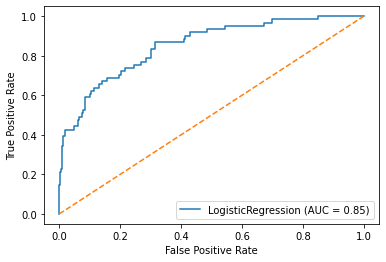

In [104]:
from sklearn.metrics import plot_roc_curve
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (roc_auc_1))
# plot the roc curve for the model
plot_roc_curve(model_2, X_test, y_test)
plt.plot(ns_fpr, ns_tpr, linestyle='--')
plt.show()

Quanto maior o AUC Score, mais alta é a curva ROC, e melhor é o modelo treinado. Isso acontece pq o TPR consegue ter um valor alto enquanto mantém um valor baixo de falsos positivos (FPR).

## Otimizando o modelo de predição

Para garantir um modelo otimizado é possível utilizar o ``GridSearchCV``, uma função que permite uma pesquisa do melhor modelo a ser utilizado, de acordo com uma série de valores definidos pelo usuário para os hiper-parâmetros. 

Os parâmetros e valores para a determinação do melhor modelo possível são os dispostos na célula seguinte. A busca de hiperparâmetros é feita com *cross-validation* = 20 e o valor a ser otimizado é o *F1-Score*.

In [36]:
from sklearn.model_selection import GridSearchCV

params = {
    'solver': ('sag', 'saga', 'lbfgs', 'newton-cg'),
    'warm_start': (True, False),
    'max_iter': [500, 1000, 1500, 2000],
    'class_weight': ('balanced', None),
    'random_state': [133],
    'C':[1, 10, 1e3, 1e5, 1e7, 1e9]
}

classifier = LogisticRegression()

random_search_f1 = GridSearchCV(classifier, param_grid=params, scoring='f1_weighted', cv=20, n_jobs=-1)

random_search_f1.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=20, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 10, 1000.0, 100000.0, 10000000.0,
                               1000000000.0],
                         'class_weight': ('balanced', None),
                         'max_iter': [500, 1000, 1500, 2000],
                         'random_state': [133],
                         'solver': ('sag', 'saga', 'lbfgs', 'newton-

In [37]:
print('\n Best estimator:')
print(random_search_f1.best_estimator_)
print('\n Best hyperparameters:')
print(random_search_f1.best_params_)


 Best estimator:
LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=133, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=True)

 Best hyperparameters:
{'C': 10, 'class_weight': None, 'max_iter': 2000, 'random_state': 133, 'solver': 'lbfgs', 'warm_start': True}


O melhor modelo encontrado é o disposto a seguir. Utilizando-o para predição do conjunto de teste, têm-se:

In [107]:
model_3 = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=3000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=133, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=True).fit(X_train,y_train)

y_pred = model_3.predict(X_test)
print(classification_report(y_test, y_pred))

acc = accuracy_score(y_test, y_pred, normalize=False)
acc_norm = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, pos_label='Sim')

print('\n Acurácia: %.0f predições certas entre %d predições realizadas (%.3f)'% (acc,len(y_test),acc_norm))
print('F1-Score (Sim): %.3f' % f1)

              precision    recall  f1-score   support

         Não       0.90      0.99      0.94       350
         Sim       0.86      0.39      0.54        61

    accuracy                           0.90       411
   macro avg       0.88      0.69      0.74       411
weighted avg       0.90      0.90      0.88       411


 Acurácia: 370 predições certas entre 411 predições realizadas (0.900)
F1-Score (Sim): 0.539


Houve uma pequena melhora novamente, com o aumento da precisão, da sensibilidade e do *F1-Score* do valor-alvo `Sim`. 

In [103]:
lr_probs_2= model_3.predict_proba(X_test)
lr_probs_2 = lr_probs_2[:,1]
fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, lr_probs_2, pos_label='Sim')
roc_auc_2 = auc(fpr_2, tpr_2)
print('AUC Score: %.3f'%roc_auc_2)
GINI_2 = (2 * roc_auc_2) - 1
print('GINI: %.3f' % GINI_2)

AUC Score: 0.852
GINI: 0.704


Vê-se também pequenas melhoras nos valores de AUC e GINI. Plotando novamente a curva ROC, obtêm-se:

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.852


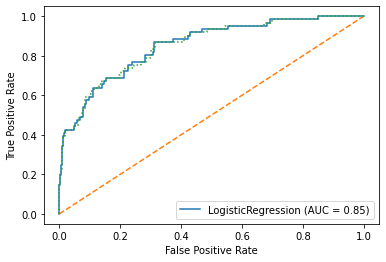

In [113]:
from sklearn.metrics import plot_roc_curve
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (roc_auc_2))
# plot the roc curve for the model
plot_roc_curve(model_3, X_test, y_test)
lr1_fpr, lr1_tpr, _ = roc_curve(y_test, lr_probs_1,pos_label='Sim')
lr2_fpr, lr2_tpr, _ = roc_curve(y_test, lr_probs_2,pos_label='Sim')

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr1_fpr, lr1_tpr, linestyle=':', label='Logistic model_1')
plt.show()

A curva pouco se alterou, como é possível ver acima. A curva do modelo anterior é representada pelo pontilhado verde, que quase se confunde com a linha azul.

## Conclusão

Foi obtido um modelo satisfatório, mas pelo fato dele possuir uma quantidade muito grande de *features*, provavelmente é possível construir um modelo melhor com menos variáveis. Para isso, é necessário realizar uma maior análise exploratória e uma seleção melhor das variáveis do modelo, além de testes com técnicas de balanceamento do dataset.